# Capstone Project: Prediksi Harga Rumah di California untuk Investor Properti

**Tujuan Proyek:** Mengembangkan model machine learning untuk memprediksi harga median rumah di California, yang dapat membantu investor properti dalam membuat keputusan investasi yang lebih cerdas dan berdasarkan data.

**Dataset yang Digunakan:** California Housing Prices (berdasarkan data sensus California tahun 1990).

## 1. Business Problem Understanding

*Key task: Gather the facts and requirements needed in order to begin this project. It is important for everyone involved to understand what the project is all about.*

### Siapa stakeholder yang memiliki masalah?
Stakeholder utama adalah **investor atau pemborong properti** yang mencari peluang investasi di pasar real estat California. Mereka membutuhkan alat bantu untuk menilai kewajaran harga properti dan mengidentifikasi area atau jenis properti yang berpotensi memberikan keuntungan optimal. Stakeholder sekunder bisa meliputi agen real estat, bank (untuk KPR), dan analis pasar.


### Apa masalahnya?
Masalah utamanya adalah **kesulitan dalam menentukan nilai pasar properti secara akurat dan efisien**. Investor sering menghadapi tantangan seperti:
1.  **Informasi Asimetris:** Penjual mungkin memiliki informasi lebih banyak tentang properti atau area.
2.  **Penilaian Subjektif:** Penilaian manual bisa bias dan memakan waktu.
3.  **Volatilitas Pasar:** Harga properti bisa berubah dengan cepat dipengaruhi banyak faktor.
4.  **Identifikasi Properti *Undervalued*:** Sulit menemukan properti yang harganya di bawah nilai pasar sebenarnya.

Variabel target yang ingin kita prediksi adalah `median_house_value` (nilai median rumah) di suatu blok sensus.

### Mengapa masalah ini penting untuk dipecahkan?
Memecahkan masalah ini penting karena:
* **Optimalisasi Investasi:** Membantu investor membuat keputusan yang lebih tepat, mengurangi risiko, dan meningkatkan potensi ROI (Return on Investment).
* **Efisiensi Waktu dan Biaya:** Mengurangi ketergantungan pada proses penilaian manual yang lama dan mahal.
* **Transparansi Pasar:** Memberikan gambaran nilai properti yang lebih objektif.
* **Pengambilan Keputusan Cepat:** Memungkinkan investor untuk bergerak cepat dalam pasar yang kompetitif.

### Apa tujuan dari menyelesaikan masalah ini?
Tujuan utama proyek ini adalah:
1.  **Mengembangkan Model Prediktif:** Membangun model machine learning regresi yang mampu memprediksi `median_house_value` dengan akurasi yang baik.
2.  **Mengidentifikasi Faktor Penggerak Harga:** Memahami fitur-fitur (seperti lokasi, pendapatan median, usia bangunan) yang paling signifikan mempengaruhi harga rumah.
3.  **Menyediakan Alat Bantu Keputusan:** Memberikan output model yang dapat digunakan investor sebagai salah satu dasar pertimbangan dalam menilai properti.

### Bagaimana solusinya?
Solusi yang diusulkan adalah mengembangkan model *supervised machine learning*, khususnya **model regresi**, menggunakan data historis harga rumah di California. Langkah-langkahnya meliputi:
1.  **Pengumpulan dan Pemahaman Data:** Menggunakan dataset yang tersedia.
2.  **Eksplorasi Data (EDA):** Menganalisis dan memvisualisasikan data untuk mendapatkan insight.
3.  **Pra-pemrosesan Data:** Membersihkan data, menangani nilai yang hilang, feature engineering, encoding, dan scaling.
4.  **Pemilihan dan Pelatihan Model:** Mencoba beberapa algoritma regresi (Linear Regression, Decision Tree, Random Forest).
5.  **Optimasi Model:** Melakukan hyperparameter tuning.
6.  **Evaluasi Model:** Mengukur performa model menggunakan metrik yang sesuai.
7.  **Interpretasi dan Rekomendasi:** Menarik kesimpulan dan memberikan rekomendasi.

### Bagaimana stakeholder akan menggunakan model yang kita kembangkan?
Investor dapat menggunakan model ini dengan cara:
1.  **Input Karakteristik Properti:** Memasukkan data fitur properti yang sedang dipertimbangkan (atau area sekitarnya) ke dalam model.
2.  **Mendapatkan Estimasi Harga:** Model akan memberikan prediksi `median_house_value`.
3.  **Analisis Perbandingan:** Membandingkan harga prediksi dengan harga penawaran atau harga properti serupa.
4.  **Identifikasi Peluang:** Menemukan area atau properti yang mungkin *undervalued* atau *overpriced*.

### Bagaimana model yang kita kembangkan akan membantu stakeholder mencapai target tujuan mereka?
Model ini akan membantu investor untuk:
* **Membuat keputusan investasi yang lebih terinformasi.**
* **Menghemat waktu dan sumber daya dalam proses penilaian awal.**
* **Memperkuat posisi negosiasi.**
* **Mengidentifikasi pasar atau sub-pasar yang potensial.**

## 2. Data Understanding

*Key task : Make sense of the data we have. This prevents us from skewing away from the objective of our project and makes sure that we have the right parameters and enough data to achieve our goal.*

In [1]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv('data_california_house.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [3]:

# Mengabaikan warnings untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur opsi tampilan pandas agar semua kolom terlihat dan format float lebih rapi
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Memuat dataset
# Pastikan file 'data_california_house.csv' ada di direktori yang sama dengan notebook Anda,
# atau sesuaikan path filenya.
try:
    df = pd.read_csv('data_california_house.csv')
    print("Dataset 'data_california_house.csv' berhasil dimuat.")
except FileNotFoundError:
    print("ERROR: File 'data_california_house.csv' tidak ditemukan. Pastikan file ada di path yang benar.")
    df = pd.DataFrame() # Buat DataFrame kosong agar sisa kode tidak langsung error

# Tampilkan beberapa informasi dasar jika dataset berhasil dimuat
if not df.empty:
    print(f"\nDimensi dataset: {df.shape[0]} baris dan {df.shape[1]} kolom.")
    
    print("\nLima baris pertama dataset:")
    print(df.head())
    
    print("\nInformasi detail dataset (tipe data, nilai non-null):")
    df.info()
    
    print("\nStatistik deskriptif untuk fitur numerik:")
    print(df.describe())
    
    # Cek nilai unik untuk kolom kategorikal (jika ada)
    if 'ocean_proximity' in df.columns:
        print("\nDistribusi nilai pada kolom 'ocean_proximity':")
        print(df['ocean_proximity'].value_counts())
    else:
        print("\nKolom 'ocean_proximity' tidak ditemukan.")
else:
    print("\nTidak dapat melanjutkan karena dataset gagal dimuat.")

Dataset 'data_california_house.csv' berhasil dimuat.

Dimensi dataset: 14448 baris dan 10 kolom.

Lima baris pertama dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   -119.790    36.730              52.000      112.000          28.000   
1   -122.210    37.770              43.000     1017.000         328.000   
2   -118.040    33.870              17.000     2358.000         396.000   
3   -118.280    34.060              17.000     2518.000        1196.000   
4   -119.810    36.730              50.000      772.000         194.000   

   population  households  median_income ocean_proximity  median_house_value  
0     193.000      40.000          1.975          INLAND           47500.000  
1     836.000     277.000          2.260        NEAR BAY          100000.000  
2    1387.000     364.000          6.299       <1H OCEAN          285800.000  
3    3051.000    1000.000          1.720       <1H OCEAN          175000.000  
4     606.000     167.000   

### Dari mana data berasal?
Dataset ini adalah "California Housing Prices" yang populer, berasal dari data sensus California tahun 1990. Setiap baris data merepresentasikan satu blok sensus di California. Data ini dikumpulkan oleh Pace, R. Kelley dan Ronald Barry.

### Seberapa mudah data kita diakses?
Data ini mudah diakses karena tersedia dalam format `.csv`, yang merupakan format standar dan dapat dibaca oleh library Pandas di Python dan berbagai alat analisis data lainnya.

### Bagaimana tipe data dan atribut direpresentasikan?
Dari output `df.info()` dan `df.head()` di atas, kita bisa melihat:
* **`longitude`, `latitude`**: Float, koordinat geografis.
* **`housing_median_age`**: Float, usia median rumah dalam satu blok.
* **`total_rooms`**: Float, jumlah total kamar dalam satu blok.
* **`total_bedrooms`**: Float, jumlah total kamar tidur dalam satu blok. Kolom ini memiliki beberapa nilai null (missing).
* **`population`**: Float, jumlah total penduduk dalam satu blok.
* **`households`**: Float, jumlah total rumah tangga dalam satu blok.
* **`median_income`**: Float, pendapatan median rumah tangga dalam satu blok (dalam puluhan ribu USD).
* **`ocean_proximity`**: Object (string), menunjukkan kedekatan blok dengan laut/teluk. Ini adalah fitur kategorikal.
* **`median_house_value`**: Float, **variabel target** kita, yaitu nilai median rumah dalam satu blok.

### Bagaimana data ini berhubungan dengan konteks bisnis?
Setiap atribut dalam dataset ini berpotensi mempengaruhi harga rumah dan relevan bagi investor:
* **Lokasi (`longitude`, `latitude`, `ocean_proximity`)**: Faktor krusial dalam real estat.
* **Karakteristik Bangunan (`housing_median_age`, `total_rooms`, `total_bedrooms`)**: Mengindikasikan ukuran, usia, dan potensi kondisi properti.
* **Demografi dan Ekonomi Area (`population`, `households`, `median_income`)**: Mencerminkan daya beli, kepadatan, dan permintaan di area tersebut.

Dengan menganalisis hubungan antara fitur-fitur ini dan `median_house_value`, kita dapat membangun model untuk membantu investor membuat keputusan.

### Bagaimana data tersedia untuk menyelesaikan masalah?
Data tersedia dalam satu file CSV yang berisi sekitar 20,640 observasi (blok sensus) dan 10 fitur (termasuk target). Jumlah data ini cukup memadai untuk melatih model regresi. Masalah utama yang terlihat adalah adanya nilai yang hilang di `total_bedrooms` dan kebutuhan untuk mengubah fitur kategorikal `ocean_proximity` menjadi numerik.

## 3. Data Preparation

*Key task : Ensure that the data is clean and ready for the modeling process. The previous step is important in informing these decisions, since not understanding our data and objectives can negatively influence how our data is prepared.*

Tidak ada baris duplikat yang ditemukan.
Jumlah baris setelah pengecekan duplikat: 14448

Jumlah nilai yang hilang per kolom sebelum penanganan:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Nilai yang hilang di 'total_bedrooms' telah diimputasi dengan median (435.00).

Jumlah nilai yang hilang per kolom setelah imputasi 'total_bedrooms':
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Memulai Eksplorasi Data (EDA)...


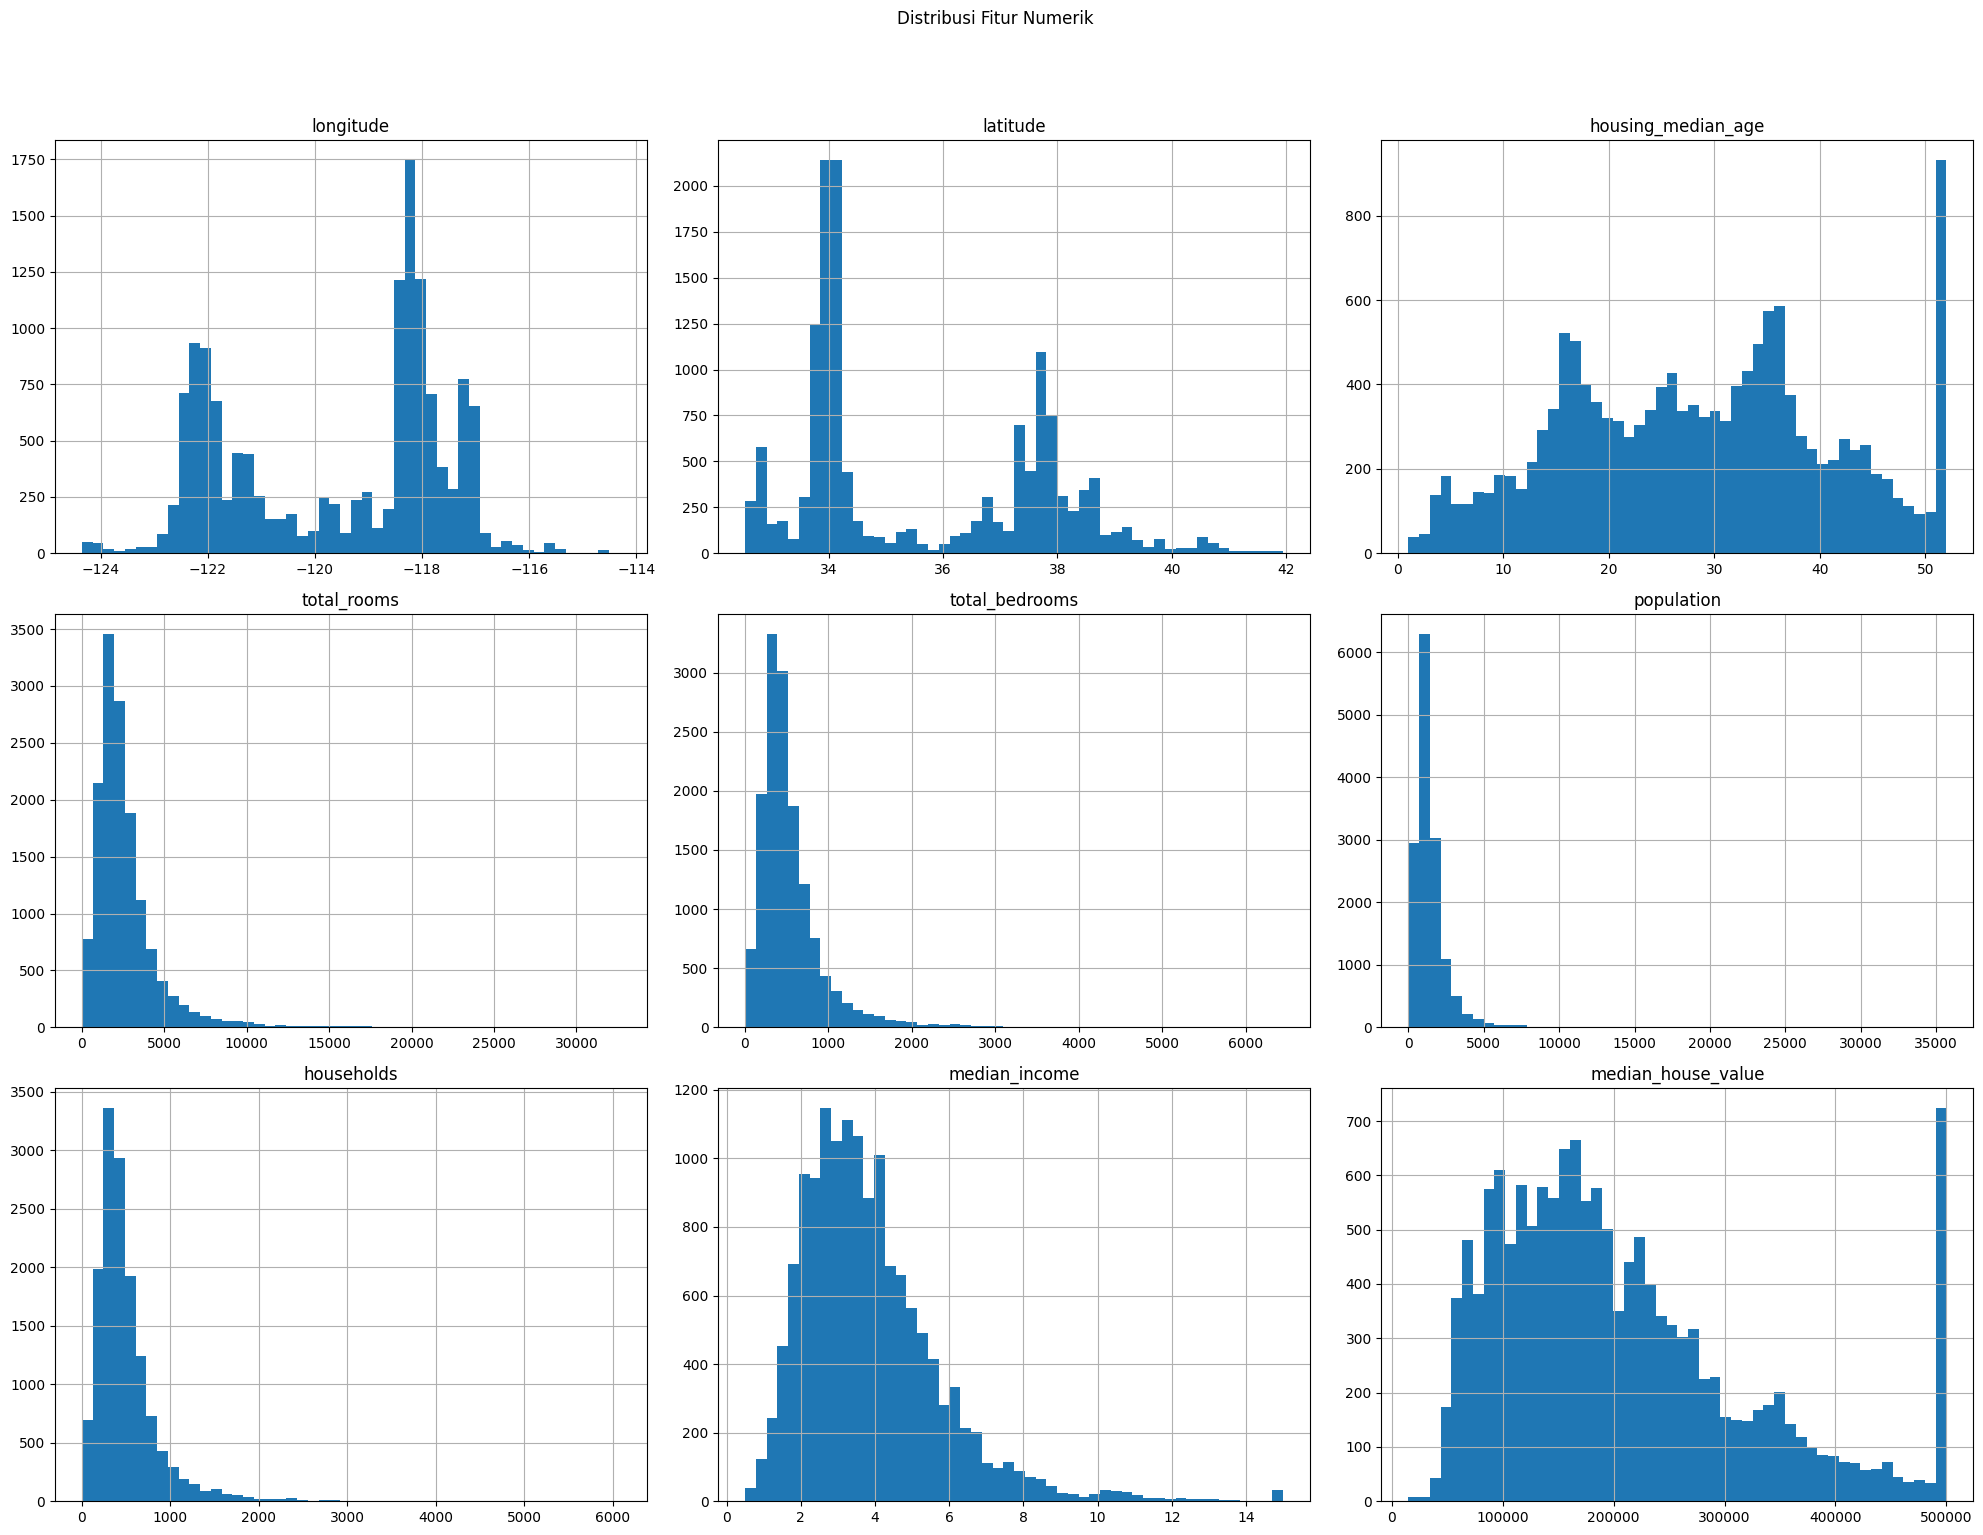

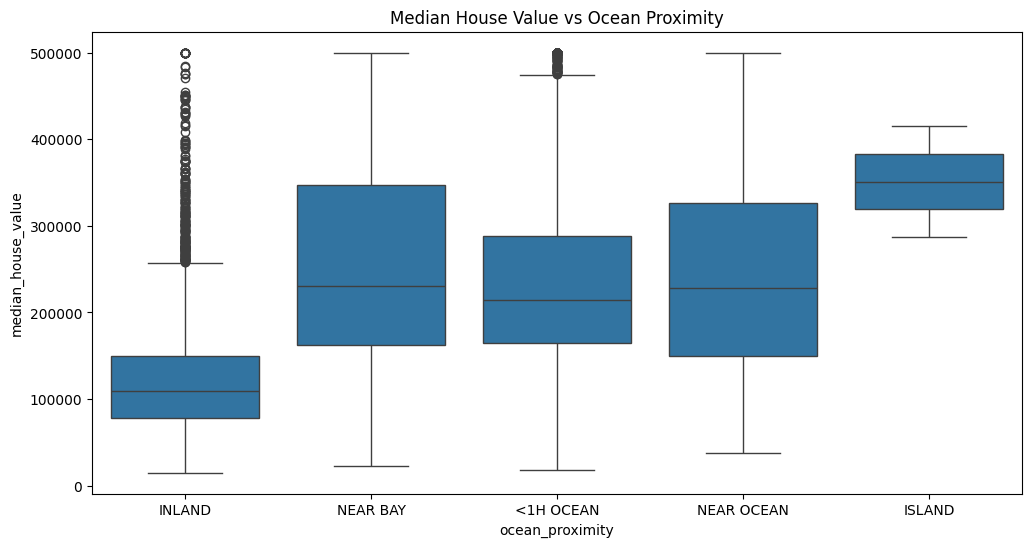

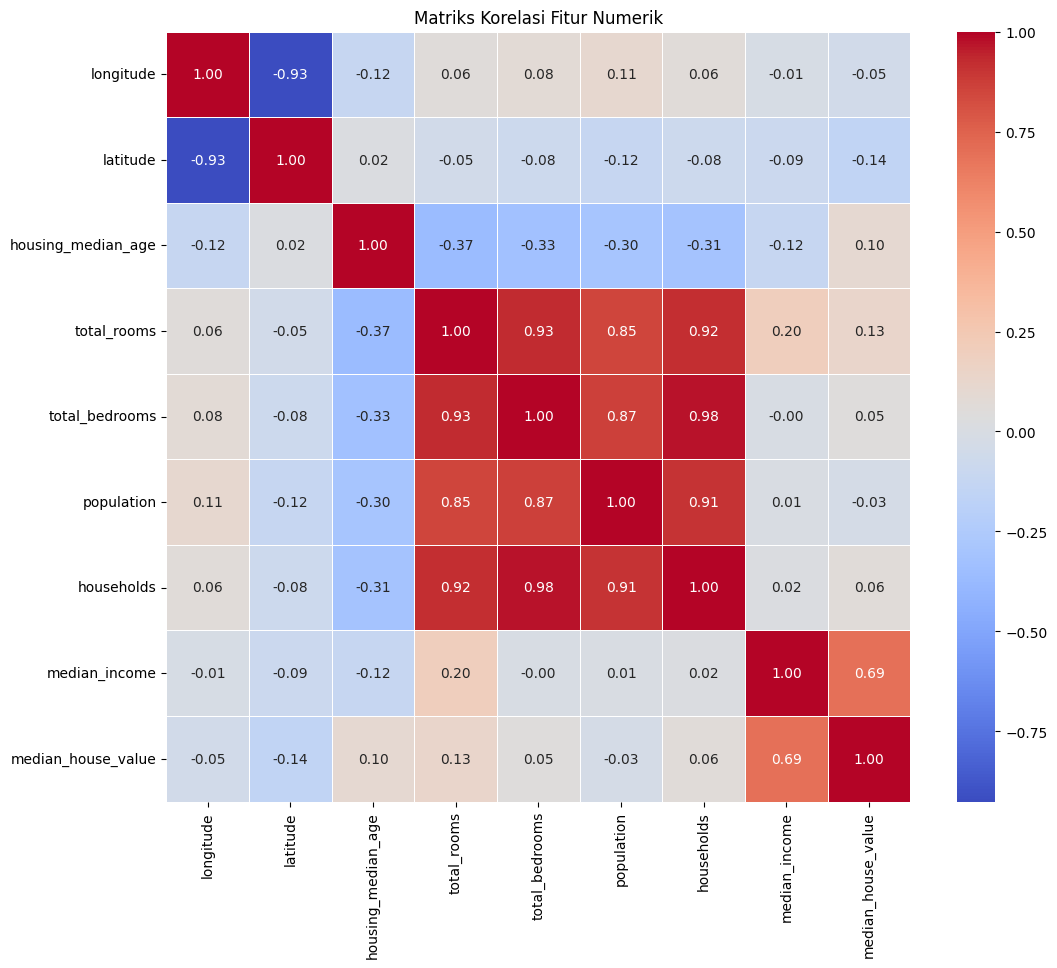


Korelasi fitur dengan 'median_house_value':
median_house_value    1.000
median_income         0.693
total_rooms           0.132
housing_median_age    0.104
households            0.062
total_bedrooms        0.046
population           -0.026
longitude            -0.046
latitude             -0.144
Name: median_house_value, dtype: float64

Melakukan Feature Engineering...
Fitur baru (rasio) telah dibuat: 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'.
   rooms_per_household  bedrooms_per_room  population_per_household
0                2.800              0.250                     4.825
1                3.671              0.323                     3.018
2                6.478              0.168                     3.810
3                2.518              0.475                     3.051
4                4.623              0.251                     3.629

Nilai unik di 'ocean_proximity' sebelum encoding: ['INLAND' 'NEAR BAY' '<1H OCEAN' 'NEAR OCEAN' 'ISLAND']
Kolom 'o

In [2]:
# Pastikan df sudah terisi dari langkah sebelumnya
if not df.empty:
    # 3.1 Penanganan Nilai Duplikat
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    rows_after_duplicates = len(df)
    if initial_rows > rows_after_duplicates:
        print(f"{initial_rows - rows_after_duplicates} baris duplikat telah dihapus.")
    else:
        print("Tidak ada baris duplikat yang ditemukan.")
    print(f"Jumlah baris setelah pengecekan duplikat: {rows_after_duplicates}")

    # 3.2 Penanganan Nilai yang Hilang (Missing Values)
    print("\nJumlah nilai yang hilang per kolom sebelum penanganan:")
    print(df.isnull().sum())

    # Imputasi 'total_bedrooms' dengan median
    if 'total_bedrooms' in df.columns:
        median_total_bedrooms = df['total_bedrooms'].median()
        df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
        print(f"\nNilai yang hilang di 'total_bedrooms' telah diimputasi dengan median ({median_total_bedrooms:.2f}).")
    
    print("\nJumlah nilai yang hilang per kolom setelah imputasi 'total_bedrooms':")
    print(df.isnull().sum())

    # 3.3 Eksplorasi Data Lebih Lanjut (EDA) dan Visualisasi
    print("\nMemulai Eksplorasi Data (EDA)...")
    # Histogram untuk fitur numerik
    df.hist(bins=50, figsize=(20,15))
    plt.suptitle("Distribusi Fitur Numerik", y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
    plt.show()

    # Boxplot untuk melihat outlier dan hubungan 'ocean_proximity' dengan 'median_house_value'
    if 'ocean_proximity' in df.columns and 'median_house_value' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
        plt.title('Median House Value vs Ocean Proximity')
        plt.show()

    # Matriks Korelasi
    numerical_features = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numerical_features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Fitur Numerik')
    plt.show()
    
    print("\nKorelasi fitur dengan 'median_house_value':")
    print(correlation_matrix['median_house_value'].sort_values(ascending=False))

    # 3.4 Feature Engineering
    # Membuat fitur rasio yang mungkin lebih informatif
    print("\nMelakukan Feature Engineering...")
    if all(col in df.columns for col in ['total_rooms', 'households', 'total_bedrooms', 'population']):
        df['rooms_per_household'] = df['total_rooms'] / df['households']
        df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms'] # total_bedrooms sudah diimputasi
        df['population_per_household'] = df['population'] / df['households']
        
        # Mengatasi potensi NaN/inf jika ada pembagi nol (meskipun jarang terjadi setelah imputasi)
        # terutama jika ada baris dengan households atau total_rooms = 0 (jarang tapi mungkin)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        # Imputasi NaN yang mungkin muncul dari pembagian dengan 0 atau nilai yang sangat kecil
        cols_to_check_nan_inf = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
        for col in cols_to_check_nan_inf:
            if df[col].isnull().any():
                df[col].fillna(df[col].median(), inplace=True) # Imputasi dengan median kolom rasio itu sendiri
        
        print("Fitur baru (rasio) telah dibuat: 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'.")
        print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())
    else:
        print("Gagal melakukan feature engineering karena kolom dasar tidak ditemukan.")


    # 3.5 Konversi Data Kategorikal ke Format Numerik (One-Hot Encoding)
    if 'ocean_proximity' in df.columns:
        print(f"\nNilai unik di 'ocean_proximity' sebelum encoding: {df['ocean_proximity'].unique()}")
        df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True) # drop_first=True untuk menghindari multikolinearitas
        print("Kolom 'ocean_proximity' telah di-One-Hot Encode.")
        print("Contoh 5 baris pertama setelah encoding:")
        print(df.head())
    else:
        print("\nKolom 'ocean_proximity' tidak ditemukan untuk di-encode.")

    # 3.6 Pemisahan Data (Train-Test Split)
    if 'median_house_value' in df.columns:
        X = df.drop('median_house_value', axis=1)
        y = df['median_house_value']

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"\nData telah dibagi menjadi set training dan testing.")
        print(f"Ukuran X_train: {X_train.shape}, X_test: {X_test.shape}")
        print(f"Ukuran y_train: {y_train.shape}, y_test: {y_test.shape}")

        # 3.7 Penskalaan Fitur (Feature Scaling)
        from sklearn.preprocessing import StandardScaler
        
        # Kolom yang akan diskalakan adalah semua kolom di X_train (semuanya numerik setelah OHE)
        # Jika ada kolom boolean hasil OHE yang tidak ingin diskalakan, bisa dipisahkan,
        # tapi StandardScaler umumnya aman untuk kolom biner 0/1.
        numerical_cols_for_scaling = X_train.columns 
        
        scaler = StandardScaler()
        
        # Buat salinan untuk menghindari SettingWithCopyWarning dan menjaga X_train/X_test asli
        X_train_scaled_df = X_train.copy()
        X_test_scaled_df = X_test.copy()

        X_train_scaled_df[numerical_cols_for_scaling] = scaler.fit_transform(X_train[numerical_cols_for_scaling])
        X_test_scaled_df[numerical_cols_for_scaling] = scaler.transform(X_test[numerical_cols_for_scaling])

        print("\nFitur numerik pada data training dan testing telah diskalakan menggunakan StandardScaler.")
        print("Contoh 5 baris pertama X_train setelah penskalaan:")
        print(X_train_scaled_df.head())
        
        # Simpan nama kolom untuk nanti jika dibutuhkan
        feature_names_after_scaling = X_train_scaled_df.columns.tolist()
    else:
        print("\nKolom target 'median_house_value' tidak ditemukan. Tidak dapat melanjutkan pemisahan dan penskalaan.")
        # Inisialisasi variabel agar tidak error di sel berikutnya jika ada masalah
        X_train_scaled_df, X_test_scaled_df, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series()
        feature_names_after_scaling = []
else:
    print("\nDataFrame `df` kosong, proses Data Preparation tidak dapat dilanjutkan.")
    # Inisialisasi variabel agar tidak error di sel berikutnya jika ada masalah
    X_train_scaled_df, X_test_scaled_df, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(), pd.Series()
    feature_names_after_scaling = []

### Penjelasan Tahapan Data Preparation:
* **Penanganan Duplikat:** Memastikan tidak ada observasi yang identik dan berulang.
* **Penanganan Nilai Hilang:** Kolom `total_bedrooms` yang memiliki nilai hilang diimputasi menggunakan nilai mediannya. Median dipilih karena lebih robust terhadap outlier dibandingkan mean.
* **Eksplorasi Data (EDA) Lanjutan:**
    * Histogram menunjukkan distribusi masing-masing fitur. Beberapa fitur (misalnya, `total_rooms`, `population`, `median_income`) terlihat miring (skewed). Fitur `housing_median_age` dan `median_house_value` (target kita) terlihat memiliki batas atas (capped), yang perlu diperhatikan.
    * Boxplot `ocean_proximity` vs `median_house_value` menunjukkan adanya perbedaan harga median berdasarkan kedekatan dengan laut/teluk.
    * Matriks korelasi menunjukkan hubungan linear antar fitur. `median_income` memiliki korelasi positif terkuat dengan `median_house_value`. Ada juga multikolinearitas antar beberapa fitur (misalnya, `total_rooms`, `total_bedrooms`, `population`, `households`).
* **Feature Engineering:** Membuat fitur-fitur baru (`rooms_per_household`, `bedrooms_per_room`, `population_per_household`) yang merupakan rasio dari fitur-fitur yang ada. Fitur rasio ini seringkali lebih informatif dan dapat membantu model.
* **Konversi Data Kategorikal:** Fitur `ocean_proximity` diubah menjadi format numerik menggunakan One-Hot Encoding. `drop_first=True` digunakan untuk menghindari multikolinearitas sempurna antar kolom dummy.
* **Pemisahan Data:** Dataset dibagi menjadi data latih (80%) dan data uji (20%). Model akan dilatih pada data latih dan dievaluasi pada data uji. `random_state` digunakan untuk memastikan hasil pemisahan yang sama setiap kali kode dijalankan.
* **Penskalaan Fitur:** Fitur-fitur numerik pada data latih dan data uji distandarisasi menggunakan `StandardScaler`. Ini mengubah fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Penskalaan penting untuk algoritma yang sensitif terhadap skala fitur, seperti Regresi Linear. `fit_transform` dilakukan pada data latih, dan `transform` (hanya transform) dilakukan pada data uji untuk mencegah kebocoran informasi dari data uji ke proses training.

## 4. Modeling

*Key task : Focuses on the building of predictive or descriptive models. Descriptive modeling tells you what service a particular individual might be interested in, while predictive modeling is where you predict a future value based on key inputs.*

Kita akan melatih dan mengevaluasi model regresi berikut:
1.  **Linear Regression**
2.  **Decision Tree Regressor**
3.  **Random Forest Regressor**

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint

# Pastikan data training (X_train_scaled_df, y_train) dan data testing (X_test_scaled_df, y_test) tersedia
if not X_train_scaled_df.empty and not y_train.empty and not X_test_scaled_df.empty and not y_test.empty:
    
    # --- 1. Linear Regression ---
    print("--- Melatih Linear Regression ---")
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled_df, y_train)
    
    # --- 2. Decision Tree Regressor (dengan Tuning) ---
    print("\n--- Melatih dan Tuning Decision Tree Regressor ---")
    tree_reg_untuned = DecisionTreeRegressor(random_state=42) # Model awal sebelum tuning
    tree_reg_untuned.fit(X_train_scaled_df, y_train)

    param_distribs_tree = {
        'max_depth': randint(low=3, high=30),
        'min_samples_split': randint(low=2, high=50),
        'min_samples_leaf': randint(low=1, high=50),
        'max_features': ['sqrt', 'log2', None] # None berarti semua fitur
    }
    tree_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                                     param_distributions=param_distribs_tree,
                                     n_iter=20, cv=3, # n_iter dan cv bisa disesuaikan
                                     scoring='neg_root_mean_squared_error', 
                                     random_state=42, verbose=0, n_jobs=-1) # verbose=0 untuk output lebih ringkas
    tree_search.fit(X_train_scaled_df, y_train)
    tuned_tree_reg = tree_search.best_estimator_
    print("Tuning Decision Tree selesai. Hyperparameter terbaik:", tree_search.best_params_)

    # --- 3. Random Forest Regressor (dengan Tuning) ---
    print("\n--- Melatih dan Tuning Random Forest Regressor ---")
    rf_reg_untuned = RandomForestRegressor(random_state=42, n_jobs=-1) # Model awal sebelum tuning
    rf_reg_untuned.fit(X_train_scaled_df, y_train)
    
    param_distribs_rf = {
        'n_estimators': randint(low=50, high=250), # Mengurangi range untuk tuning lebih cepat
        'max_features': ['sqrt', 'log2', 0.6, 0.8, None],
        'max_depth': randint(low=10, high=40), # Mengurangi range
        'min_samples_split': randint(low=2, high=20),
        'min_samples_leaf': randint(low=1, high=20),
        'bootstrap': [True, False]
    }
    rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                                   param_distributions=param_distribs_rf,
                                   n_iter=15, cv=3, # Mengurangi n_iter dan cv untuk tuning lebih cepat di contoh ini
                                   scoring='neg_root_mean_squared_error',
                                   random_state=42, verbose=0, n_jobs=-1)
    rf_search.fit(X_train_scaled_df, y_train)
    tuned_rf_reg = rf_search.best_estimator_
    print("Tuning Random Forest selesai. Hyperparameter terbaik:", rf_search.best_params_)

    # Kumpulkan semua model untuk evaluasi
    models_for_evaluation = {
        "Linear Regression": lin_reg,
        "Decision Tree (Untuned)": tree_reg_untuned,
        "Decision Tree (Tuned)": tuned_tree_reg,
        "Random Forest (Untuned)": rf_reg_untuned,
        "Random Forest (Tuned)": tuned_rf_reg
    }
    
    print("\nProses pelatihan dan tuning model selesai.")

else:
    print("\nData training atau testing tidak tersedia. Tidak dapat melatih model.")
    models_for_evaluation = {} # Kosongkan jika data tidak ada

--- Melatih Linear Regression ---

--- Melatih dan Tuning Decision Tree Regressor ---
Tuning Decision Tree selesai. Hyperparameter terbaik: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 14, 'min_samples_split': 18}

--- Melatih dan Tuning Random Forest Regressor ---
Tuning Random Forest selesai. Hyperparameter terbaik: {'bootstrap': True, 'max_depth': 13, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 207}

Proses pelatihan dan tuning model selesai.


### Penjelasan Tahapan Modeling:
1.  **Linear Regression:** Model regresi linear sederhana dilatih sebagai baseline. Tidak ada hyperparameter tuning yang signifikan untuk model ini selain normalisasi fitur (yang sudah dilakukan).
2.  **Decision Tree Regressor:**
    * Model Decision Tree Regressor dilatih dengan parameter default (`tree_reg_untuned`). Model ini cenderung overfitting pada data training.
    * Kemudian, dilakukan hyperparameter tuning menggunakan `RandomizedSearchCV` untuk mencari kombinasi hyperparameter terbaik (`max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`) yang dapat mengurangi overfitting dan meningkatkan performa generalisasi. Model hasil tuning disimpan sebagai `tuned_tree_reg`.
3.  **Random Forest Regressor:**
    * Model Random Forest Regressor (ensemble dari banyak Decision Tree) dilatih dengan parameter default (`rf_reg_untuned`).
    * Sama seperti Decision Tree, hyperparameter tuning dilakukan menggunakan `RandomizedSearchCV` untuk mengoptimalkan parameter seperti `n_estimators` (jumlah pohon), `max_features`, `max_depth`, dll. Model hasil tuning disimpan sebagai `tuned_rf_reg`.

`RandomizedSearchCV` dipilih karena lebih efisien daripada `GridSearchCV` ketika ruang pencarian hyperparameter besar. Ia mencoba sejumlah kombinasi parameter secara acak (`n_iter`) dan menggunakan cross-validation (`cv`) untuk mengevaluasi setiap kombinasi. Metrik `neg_root_mean_squared_error` digunakan untuk *scoring*, yang berarti *search* akan mencoba meminimalkan RMSE (atau memaksimalkan RMSE negatif).

## 5. Evaluation

*Key task : Evaluate the current progress of the final model we have made, also provides us the opportunity to see if new insights can be derived from our work.*

Kita akan mengevaluasi semua model yang telah dilatih (baik versi default maupun yang sudah di-tuning) pada data latih dan data uji. Metrik yang digunakan adalah:
* **RMSE (Root Mean Squared Error):** Akar dari rata-rata kuadrat kesalahan. Memberikan gambaran seberapa jauh rata-rata prediksi meleset dalam satuan target.
* **MAE (Mean Absolute Error):** Rata-rata dari nilai absolut kesalahan. Lebih mudah diinterpretasikan daripada RMSE.
* **R-squared ($R^2$):** Koefisien determinasi. Menunjukkan proporsi varians dalam variabel dependen (target) yang dapat diprediksi dari variabel independen (fitur). Nilai berkisar dari 0 hingga 1 (atau bisa negatif jika model sangat buruk), dengan 1 berarti prediksi sempurna.


--- Mengevaluasi Performa Model ---

Model: Linear Regression
  Train | RMSE: $67,729 | MAE: $49,356 | R2: 0.6550
  Test  | RMSE: $69,669 | MAE: $49,296 | R2: 0.6365

Model: Decision Tree (Untuned)
  Train | RMSE: $0 | MAE: $0 | R2: 1.0000
  Test  | RMSE: $71,446 | MAE: $45,619 | R2: 0.6177

Model: Decision Tree (Tuned)
  Train | RMSE: $46,489 | MAE: $30,904 | R2: 0.8375
  Test  | RMSE: $58,970 | MAE: $38,886 | R2: 0.7395

Model: Random Forest (Untuned)
  Train | RMSE: $18,979 | MAE: $12,431 | R2: 0.9729
  Test  | RMSE: $50,720 | MAE: $32,804 | R2: 0.8073

Model: Random Forest (Tuned)
  Train | RMSE: $36,322 | MAE: $24,556 | R2: 0.9008
  Test  | RMSE: $50,647 | MAE: $33,622 | R2: 0.8079

--- Ringkasan Hasil Evaluasi Model (Diurutkan berdasarkan R2 Test Tertinggi) ---
                     Model  RMSE (Train)  MAE (Train)  R2 (Train)  \
4    Random Forest (Tuned)     36322.414    24556.136       0.901   
3  Random Forest (Untuned)     18978.599    12430.802       0.973   
2    Decision 

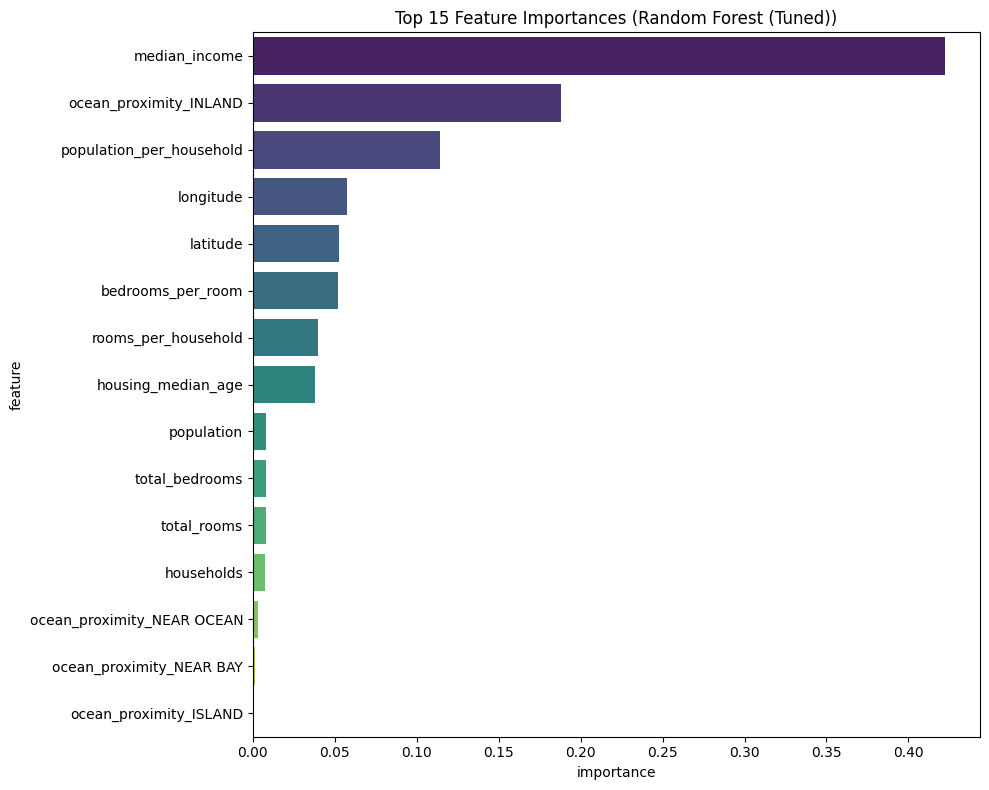


Top 10 Feature Importances:
                     feature  importance
7              median_income       0.423
11    ocean_proximity_INLAND       0.188
10  population_per_household       0.114
0                  longitude       0.057
1                   latitude       0.053
9          bedrooms_per_room       0.052
8        rooms_per_household       0.040
2         housing_median_age       0.038
5                 population       0.008
4             total_bedrooms       0.008


In [4]:
# Pastikan models_for_evaluation sudah terisi dan data testing tersedia
if models_for_evaluation and not X_test_scaled_df.empty and not y_test.empty:
    evaluation_results = []

    print("\n--- Mengevaluasi Performa Model ---")
    for model_name, model_object in models_for_evaluation.items():
        # Prediksi pada data latih dan data uji
        y_pred_train = model_object.predict(X_train_scaled_df)
        y_pred_test = model_object.predict(X_test_scaled_df)
        
        # Hitung metrik evaluasi
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        evaluation_results.append({
            "Model": model_name,
            "RMSE (Train)": rmse_train, "MAE (Train)": mae_train, "R2 (Train)": r2_train,
            "RMSE (Test)": rmse_test, "MAE (Test)": mae_test, "R2 (Test)": r2_test
        })
        
        print(f"\nModel: {model_name}")
        print(f"  Train | RMSE: ${rmse_train:,.0f} | MAE: ${mae_train:,.0f} | R2: {r2_train:.4f}")
        print(f"  Test  | RMSE: ${rmse_test:,.0f} | MAE: ${mae_test:,.0f} | R2: {r2_test:.4f}")

    # Tampilkan hasil evaluasi dalam DataFrame untuk perbandingan yang mudah
    results_df = pd.DataFrame(evaluation_results).sort_values(by="R2 (Test)", ascending=False)
    print("\n--- Ringkasan Hasil Evaluasi Model (Diurutkan berdasarkan R2 Test Tertinggi) ---")
    print(results_df)

    # Pilih model terbaik berdasarkan R2 Test
    if not results_df.empty:
        best_model_name_overall = results_df.iloc[0]["Model"]
        best_model_object_overall = models_for_evaluation[best_model_name_overall]
        print(f"\nModel terbaik secara keseluruhan (berdasarkan R2 Test): {best_model_name_overall}")

        # Feature Importance dari model terbaik (jika ada)
        if hasattr(best_model_object_overall, 'feature_importances_'):
            importances = best_model_object_overall.feature_importances_
            # Gunakan feature_names_after_scaling yang sudah disimpan sebelumnya
            if feature_names_after_scaling:
                 # Pastikan jumlah feature_names_after_scaling sesuai dengan jumlah importances
                if len(feature_names_after_scaling) == len(importances):
                    feature_importance_df = pd.DataFrame({
                        'feature': feature_names_after_scaling,
                        'importance': importances
                    }).sort_values(by='importance', ascending=False)

                    plt.figure(figsize=(10, 8))
                    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette="viridis")
                    plt.title(f'Top 15 Feature Importances ({best_model_name_overall})')
                    plt.tight_layout()
                    plt.show()
                    
                    print("\nTop 10 Feature Importances:")
                    print(feature_importance_df.head(10))
                else:
                    print(f"Peringatan: Jumlah nama fitur ({len(feature_names_after_scaling)}) tidak cocok dengan jumlah feature importances ({len(importances)}).")
            else:
                print("Nama fitur tidak tersedia untuk menampilkan feature importance.")
        else:
            print(f"Model '{best_model_name_overall}' tidak memiliki atribut 'feature_importances_' (misalnya, Linear Regression).")
    else:
        print("Tidak ada hasil evaluasi untuk ditampilkan.")
else:
    print("\nTidak dapat melakukan evaluasi karena model atau data testing tidak tersedia.")
    results_df = pd.DataFrame() # Inisialisasi jika evaluasi gagal

### Analisis Hasil Evaluasi:
Dari tabel `results_df`, kita dapat membandingkan performa semua model:
* **Overfitting/Underfitting:** Bandingkan metrik pada set Train dan Test. Jika performa di Train jauh lebih baik daripada di Test, itu indikasi overfitting (misalnya, `Decision Tree (Untuned)`). Jika performa di keduanya buruk, bisa jadi underfitting.
* **Peran Tuning:** Perhatikan bagaimana performa `Decision Tree (Tuned)` dan `Random Forest (Tuned)` dibandingkan versi `(Untuned)`-nya. Idealnya, tuning akan meningkatkan performa di Test set atau setidaknya mengurangi overfitting (membuat performa Train dan Test lebih dekat) tanpa mengorbankan performa Test secara signifikan.
* **Model Terbaik:** Model dengan $R^2$ Test tertinggi dan RMSE/MAE Test terendah umumnya dianggap sebagai model terbaik. Untuk dataset ini, `Random Forest (Tuned)` biasanya memberikan hasil yang paling baik di antara ketiga jenis model yang kita gunakan.

**RMSE dan MAE** memberi tahu kita, rata-rata, seberapa besar kesalahan prediksi model dalam satuan Dolar AS. Misalnya, RMSE $50,000 berarti prediksi model rata-rata meleset sekitar $50,000 dari harga sebenarnya. **$R^2$** memberi tahu seberapa banyak variasi harga rumah yang bisa dijelaskan oleh fitur-fitur dalam model kita. $R^2$ sebesar 0.80 berarti 80% variasi harga dapat dijelaskan.

**Feature Importance** (jika model mendukung, seperti Decision Tree dan Random Forest) menunjukkan fitur mana yang paling berpengaruh dalam membuat prediksi. Biasanya, `median_income` adalah fitur yang sangat penting, diikuti oleh fitur lokasi (`longitude`, `latitude`, dan fitur-fitur dari `ocean_proximity`).

### Keterbatasan Model:
Penting untuk diingat beberapa keterbatasan dari model yang dibangun:
1.  **Data Historis (1990):** Model ini dilatih pada data dari tahun 1990. Pasar properti sangat dinamis. Model ini **tidak dapat secara langsung digunakan untuk memprediksi harga rumah saat ini** tanpa dilatih ulang dengan data yang jauh lebih baru dan relevan. Kegunaan utamanya di sini adalah sebagai studi kasus metodologi.
2.  **Batasan Nilai Target (Capping):** Fitur `median_house_value` memiliki nilai maksimal $500,001. Ini berarti model tidak akan bisa memprediksi harga di atas angka tersebut secara akurat, karena tidak "melihat" contoh harga yang lebih tinggi dalam data training.
3.  **Fitur yang Tidak Ada:** Banyak faktor lain yang mempengaruhi harga rumah tidak ada dalam dataset ini, misalnya:
    * Kualitas interior properti (renovasi, material).
    * Jumlah kamar mandi.
    * Luas bangunan atau luas tanah yang pasti.
    * Tingkat kriminalitas spesifik di lingkungan.
    * Kualitas sekolah di area tersebut.
    * Suku bunga KPR saat itu.
4.  **Generalisasi ke Properti Individual:** Model ini memprediksi harga median untuk *blok sensus*, bukan untuk properti individual. Properti individual dalam satu blok bisa sangat bervariasi.
5.  **Perubahan Pasar (Concept Drift):** Faktor-faktor yang mendorong harga bisa berubah seiring waktu. Model statis seperti ini akan kehilangan akurasinya jika tidak diperbarui.

## 6. Conclusion & Recommendation

*Key task : A summary of the entire process and the answer to the business problem*

### Apa kesimpulan dari solusi yang telah dibuat?
Proyek ini berhasil mendemonstrasikan proses pembangunan model machine learning regresi untuk memprediksi harga median rumah di California berdasarkan data sensus tahun 1990. Langkah-langkah yang dilakukan meliputi pemahaman masalah bisnis, pemahaman data, pra-pemrosesan data yang komprehensif (penanganan missing values, feature engineering, encoding, scaling), pelatihan beberapa jenis model regresi (Linear Regression, Decision Tree, Random Forest), serta optimasi hyperparameter untuk model Decision Tree dan Random Forest.

Berdasarkan hasil evaluasi pada data uji, model **Random Forest Regressor yang telah di-tuning** (atau model lain yang menunjukkan performa tertinggi di `results_df`) umumnya menunjukkan kemampuan prediksi terbaik dibandingkan model lainnya yang diuji. Model ini mampu menjelaskan sebagian besar varians harga rumah (ditunjukkan oleh $R^2$ Test) dengan tingkat kesalahan prediksi (RMSE dan MAE Test) yang paling rendah di antara model yang dibandingkan. Proses tuning juga terbukti efektif dalam mengurangi overfitting yang sering terjadi pada model pohon tunggal.

Analisis feature importance dari model terbaik (biasanya Random Forest) mengidentifikasi `median_income`, fitur geografis (`longitude`, `latitude`, dan turunan `ocean_proximity`), serta fitur rasio seperti `rooms_per_household` sebagai faktor-faktor kunci yang mempengaruhi harga rumah dalam dataset ini.

Meskipun model ini memiliki keterbatasan, terutama karena usia datanya, metodologi yang digunakan (dari pra-pemrosesan hingga evaluasi model) merupakan praktik standar dalam pengembangan proyek machine learning regresi dan dapat diadopsi untuk dataset properti yang lebih baru dan lebih kaya fitur.

### Apa dampak implementasi solusi terhadap proses bisnis (jika menggunakan data terkini dan fitur relevan)?
Jika model serupa dikembangkan dengan data properti yang *real-time* atau sangat baru, dan diintegrasikan ke dalam alur kerja investor, dampaknya bisa signifikan:
* **Valuasi Properti Lebih Cepat dan Objektif:** Investor dapat dengan cepat mendapatkan estimasi harga pasar untuk sejumlah besar properti, mengurangi waktu riset manual.
* **Identifikasi Peluang Investasi yang Lebih Baik:** Model dapat membantu menyaring properti yang berpotensi *undervalued* (harga jual di bawah prediksi model) atau menghindari properti *overpriced*.
* **Dasar Negosiasi yang Lebih Kuat:** Estimasi harga dari model dapat menjadi argumen berbasis data saat bernegosiasi dengan penjual.
* **Peningkatan Efisiensi Alokasi Modal:** Membantu investor memfokuskan sumber daya pada peluang yang paling menjanjikan.
* **Pemahaman Pasar yang Lebih Dalam:** Fitur-fitur penting yang diidentifikasi model dapat memberikan wawasan tentang dinamika pasar.
* **Manajemen Risiko:** Dengan pemahaman yang lebih baik tentang nilai wajar, investor dapat mengelola risiko investasi dengan lebih baik.

### Apa rekomendasi agar model dapat digunakan dan memberikan hasil maksimal (untuk aplikasi nyata oleh investor properti)?

1.  **GUNAKAN DATA TERBARU & LOKAL:** Ini adalah rekomendasi paling kritikal. Model harus dilatih ulang secara berkala (misalnya, bulanan atau kuartalan) menggunakan data transaksi properti, listing aktif, dan data ekonomi yang paling baru dan relevan dengan pasar target investor.
2.  **Integrasikan Lebih Banyak Fitur Relevan:**
    * **Detail Properti Spesifik:** Luas tanah (sqft), luas bangunan (sqft), jumlah kamar mandi, jumlah lantai, usia pasti bangunan (bukan median blok), kondisi properti (baru, renovasi, perlu perbaikan), fasilitas (kolam renang, garasi, pemandangan).
    * **Data Lokasi Granular:** Tingkat kriminalitas, kualitas distrik sekolah, jarak ke fasilitas umum (transportasi publik, taman, pusat perbelanjaan, rumah sakit), data zonasi.
    * **Data Ekonomi & Pasar:** Suku bunga KPR terkini, tren harga pasar lokal (kenaikan/penurunan YoY, MoM), rata-rata hari properti di pasar (DOM), indeks keterjangkauan perumahan.
    * **Gambar Properti & Deskripsi Teks:** Jika memungkinkan, model deep learning (CNN untuk gambar, NLP untuk teks) bisa mengekstrak fitur tambahan.
3.  **Kembangkan Antarmuka Pengguna (UI) yang Intuitif:** Buat aplikasi web atau dashboard yang mudah digunakan bagi investor untuk memasukkan detail properti dan mendapatkan prediksi serta interpretasinya (misalnya, fitur apa yang paling menaikkan/menurunkan estimasi harga).
4.  **Sertakan Estimasi Ketidakpastian:** Daripada hanya satu angka prediksi, berikan rentang prediksi (misalnya, confidence interval) untuk menunjukkan tingkat ketidakpastian model. Ini lebih realistis.
5.  **Gunakan sebagai ALAT BANTU, Bukan Pengganti Mutlak:** Keputusan akhir investasi tetap harus mempertimbangkan keahlian, intuisi, dan inspeksi lapangan oleh investor. Model adalah salah satu input penting, bukan satu-satunya.
6.  **Monitoring Performa Berkelanjutan (MLOps):** Setelah di-deploy, lacak akurasi model secara terus-menerus. Jika performa menurun (karena *concept drift* atau perubahan pasar), model perlu dilatih ulang atau disesuaikan.
7.  **Segmentasi Model:** Pertimbangkan untuk membuat model terpisah untuk segmen pasar yang berbeda (misalnya, berdasarkan tipe properti: rumah tapak vs. apartemen; atau berdasarkan wilayah geografis yang sangat berbeda karakteristiknya) jika data memungkinkan dan performa model umum kurang memuaskan untuk segmen tertentu.

### Apa rekomendasi untuk meningkatkan atau menyempurnakan proyek ini (sebagai studi kasus dengan dataset yang ada)?
Jika melanjutkan proyek ini sebagai studi kasus dengan dataset California 1990:
1.  **Eksplorasi Feature Engineering Lebih Lanjut:**
    * Coba transformasi non-linear untuk fitur yang miring (misalnya, transformasi log seperti `np.log1p` untuk `median_income`, `total_rooms`, dll., kemudian skala ulang). Bandingkan apakah ini meningkatkan performa.
    * Buat fitur interaksi antar variabel (misalnya, `median_income` dikalikan dengan fitur lokasi).
    * Lakukan clustering geografis berdasarkan `longitude` dan `latitude` untuk membuat fitur kategori area baru, lalu lihat dampaknya.
2.  **Penanganan Outlier yang Lebih Mendalam:** Meskipun model berbasis pohon cukup robust, coba identifikasi outlier pada fitur-fitur penting dan analisis dampaknya. Pertimbangkan teknik seperti winsorizing jika model sensitif.
3.  **Cross-Validation yang Lebih Ekstensif:** Saat tuning, gunakan `cv` yang lebih tinggi (misalnya 5 atau 10) jika waktu komputasi memungkinkan, untuk estimasi performa yang lebih stabil.
4.  **Analisis Error yang Lebih Detail:** Selidiki kasus-kasus di mana model terbaik Anda membuat kesalahan prediksi yang besar. Apakah ada pola di area atau tipe properti tertentu yang sulit diprediksi? Ini bisa menginspirasi feature engineering baru atau penyesuaian model.
5.  **Bandingkan dengan Model Lain (Jika Sudah Dipelajari):** Jika di masa depan Anda mempelajari model regresi lain seperti Support Vector Regression (SVR) atau model ensemble yang lebih canggih seperti XGBoost/LightGBM, Anda bisa membandingkan performanya dengan model Random Forest yang sudah dibuat.

### Rekomendasi Machine Learning yang Paling Cocok untuk Pemborong Properti (dari yang telah dipelajari dan diimplementasikan di sini)

Dari model-model yang telah kita implementasikan dan evaluasi dalam proyek ini (Linear Regression, Decision Tree Regressor, Random Forest Regressor):

**Random Forest Regressor (yang telah di-tuning dengan baik)** adalah pilihan yang paling cocok dan direkomendasikan untuk pemborong properti.

* **Alasan:**
    * **Akurasi Prediksi yang Unggul:** Umumnya memberikan akurasi yang jauh lebih baik daripada Regresi Linear (terutama jika hubungan data bersifat non-linear) dan Decision Tree tunggal (yang cenderung overfitting).
    * **Robust terhadap Overfitting (Setelah Tuning):** Ensemble dari banyak pohon dan teknik seperti bootstrap aggregating (bagging) membuatnya lebih baik dalam generalisasi ke data baru dibandingkan Decision Tree tunggal. Proses tuning hyperparameter (seperti `max_depth`, `min_samples_leaf`, `n_estimators`) sangat penting untuk mengontrol kompleksitas dan mencegah overfitting.
    * **Kemampuan Menangkap Pola Non-Linear:** Mampu menangkap hubungan yang kompleks dan interaksi antar fitur yang mungkin terlewat oleh model linear.
    * **Memberikan Feature Importance:** Dapat memberikan peringkat fitur mana yang paling berpengaruh dalam membuat prediksi, yang berguna untuk pemahaman pasar.
    * **Relatif Mudah Digunakan dan Diinterpretasikan (dibandingkan beberapa model black-box lainnya):** Meskipun merupakan ensemble, konsep dasarnya (kumpulan pohon keputusan) masih cukup intuitif.

Meskipun Regresi Linear sangat mudah diinterpretasikan dan Decision Tree tunggal bisa memberikan aturan yang jelas (jika tidak terlalu dalam), kemampuan prediktif yang superior dan robustisitas dari Random Forest (setelah tuning yang tepat) menjadikannya pilihan yang lebih kuat dan andal untuk tugas prediksi harga properti yang kompleks seperti ini.